## Sentence Embeddings

In [1]:
from sentence_transformers import SentenceTransformer, util
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import pearsonr
import numpy as np
# 'dmsloc', 'ctxcol', 'interdmsctgABBA', '1backloc'
# ins_mapping = {"dmsloc": 'Do stimulus 1 and 2 match in LOCATION?',
#                '1backloc': 'In this task, you will see sequences of six stimuli. \n From the second stimulus onwards, you must answer whether the current stimulus matches the previous one in LOCATION ?',
#                'ctxcol': 'If stimuli 1 and 2 match in CATEGORY, match stimuli 2 and 3 based on IDENTITY, otherwise on LOCATION.',
#                'interdmsctgABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on CATEGORY. Respond as fast as you can',
            #    }



# ins_mapping = {
#                '1backloc': 'In this task, you will see sequences of six stimuli. \n From the second stimulus onwards, you must answer whether the current stimulus matches the previous one in LOCATION ?',
#                '1backctg': 'In this task, you will see sequences of six stimuli. \n From the second stimulus onwards, you must answer whether the current stimulus matches the previous one in CATEGORY ?',
#                '1backobj': 'In this task, you will see sequences of six stimuli. \n From the second stimulus onwards, you must answer whether the current stimulus matches the previous one in IDENTITY ?',
#                'ctxlco': 'If stimuli 1 and 2 match in LOCATION, match stimuli 2 and 3 based on CATEGORY, otherwise on IDENTITY.',
#                'ctxcol': 'If stimuli 1 and 2 match in CATEGORY, match stimuli 2 and 3 based on IDENTITY, otherwise on LOCATION.',
#                'interdmslocABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on LOCATION. Respond as fast as you can',
#                'interdmsctgABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on CATEGORY. Respond as fast as you can',
#                'interdmsobjABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on IDENTITY. Respond as fast as you can',
#                'interdmslocABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on LOCATION. Respond as fast as you can',
#                'interdmsctgABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on CATEGORY. Respond as fast as you can',
#                'interdmsobjABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on IDENTITY. Respond as fast as you can',
#                }


ins_mapping = {
               '1backloc': 'Match stimuli 1 and 2, 2 and 3, 3 and 4, 4 and 5, 5 and 6 based on LOCATION. Respond as fast as you can',
               '1backctg': 'Match stimuli 1 and 2, 2 and 3, 3 and 4, 4 and 5, 5 and 6 based on CATEGORY. Respond as fast as you can',
               '1backobj': 'Match stimuli 1 and 2, 2 and 3, 3 and 4, 4 and 5, 5 and 6 based on IDENTITY. Respond as fast as you can',
               'ctxlco': 'If stimuli 1 and 2 match in LOCATION, match stimuli 2 and 3 based on CATEGORY, otherwise on IDENTITY.',
               'ctxcol': 'If stimuli 1 and 2 match in CATEGORY, match stimuli 2 and 3 based on IDENTITY, otherwise on LOCATION.',
               'interdmslocABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on LOCATION. Respond as fast as you can',
               'interdmsctgABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on CATEGORY. Respond as fast as you can',
               'interdmsobjABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on IDENTITY. Respond as fast as you can',
               'interdmslocABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on LOCATION. Respond as fast as you can',
               'interdmsctgABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on CATEGORY. Respond as fast as you can',
               'interdmsobjABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on IDENTITY. Respond as fast as you can',
               }

# ins_mapping = {
#                '1backloc': 'Match stimuli 1 and 2, 2 and 3, 3 and 4, 4 and 5, 5 and 6 based on LOCATION. Respond as fast as you can',
#                '1backctg': 'Match stimuli 1 and 2, 2 and 3, 3 and 4, 4 and 5, 5 and 6 based on CATEGORY. Respond as fast as you can',
#                '1backobj': 'Match stimuli 1 and 2, 2 and 3, 3 and 4, 4 and 5, 5 and 6 based on IDENTITY. Respond as fast as you can',
#                'interdmslocABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on LOCATION. Respond as fast as you can',
#                'interdmsctgABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on CATEGORY. Respond as fast as you can',
#                'interdmsobjABBA': 'Match stimuli 2 and 3, then stimuli 1 and 4 based on IDENTITY. Respond as fast as you can',
#                'interdmslocABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on LOCATION. Respond as fast as you can',
#                'interdmsctgABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on CATEGORY. Respond as fast as you can',
#                'interdmsobjABAB': 'Match stimuli 1 and 3, and stimuli 2 and 4 based on IDENTITY. Respond as fast as you can',
#                }

tasks = ['1backloc', '1backctg', '1backobj', 'ctxlco' , 'ctxcol', 
       'interdmsobjABAB', 'interdmslocABBA', 'interdmslocABAB',
       'interdmsctgABAB', 'interdmsobjABBA','interdmsctgABBA'] 

# tasks = ['1backloc', '1backctg', '1backobj', 
#        'interdmsobjABAB', 'interdmslocABBA', 'interdmslocABAB',
#        'interdmsctgABAB', 'interdmsobjABBA','interdmsctgABBA'] 

task_features= {'loc':['1backloc', 'interdmslocABAB', 'interdmslocABBA'], 
                 'ctg':['1backctg', 'interdmsctgABAB','interdmsctgABBA' ], 
                 'obj':['1backobj', 'interdmsobjABAB', 'interdmsobjABBA']}

# tasks = ['ctxcol', 'ctxlco' ,
#        'interdmsobjABAB', 'interdmslocABBA', 'interdmslocABAB',
#        'interdmsctgABAB', 'interdmsobjABBA','interdmsctgABBA'] 

# tasks = task_features['ctg']

# sort tasks using ins_mapping dictionary keys
tasks.sort(key=lambda x: list(ins_mapping.keys()).index(x))

def pairwise_pearsonr(data):
    num_vars = data.shape[0]
    correlations = np.zeros((num_vars, num_vars))
    
    for i in range(num_vars):
        for j in range(num_vars):
            if i == j:
                correlations[i, j] = 1.0  # Diagonal elements (correlation with itself) are always 1
            else:
                correlations[i, j] = pearsonr(data[i, : ], data[j, :])[0]
    
    return correlations

def pairwise_euclidean(data):
    num_vars = data.shape[0]
    distances = np.zeros((num_vars, num_vars))

    for i in range(num_vars):
        for j in range(num_vars):
            if i == j:
                distances[i, j] = 0
            else:
                distances[i, j] = euclidean_distances(data[i, : ].reshape(1, -1), data[j, : ].reshape(1, -1))[0][0]

    return distances
            


def sentence_similarity(sentences, model):
    # Compute embeddings
    embeddings = model.encode(sentences, convert_to_tensor=True)
    

    # Compute cosine-similarities for each sentence with each other sentence
    scores = util.cos_sim(embeddings, embeddings).cpu().numpy()

    # Compute pearson correlation over all sentence embeddings
    # scores = pairwise_pearsonr(embeddings.cpu().numpy())

    # Compute euclidean distance over all sentence embeddings
    # scores = pairwise_euclidean(embeddings.cpu().numpy())

    return scores





([<matplotlib.axis.YTick at 0x381f83490>,
 [Text(0, 0, '1backloc'),
  Text(0, 1, '1backctg'),
  Text(0, 2, '1backobj'),
  Text(0, 3, 'ctxlco'),
  Text(0, 4, 'ctxcol'),
  Text(0, 5, 'interdmslocABBA'),
  Text(0, 6, 'interdmsctgABBA'),
  Text(0, 7, 'interdmsobjABBA'),
  Text(0, 8, 'interdmslocABAB'),
  Text(0, 9, 'interdmsctgABAB'),
  Text(0, 10, 'interdmsobjABAB')])

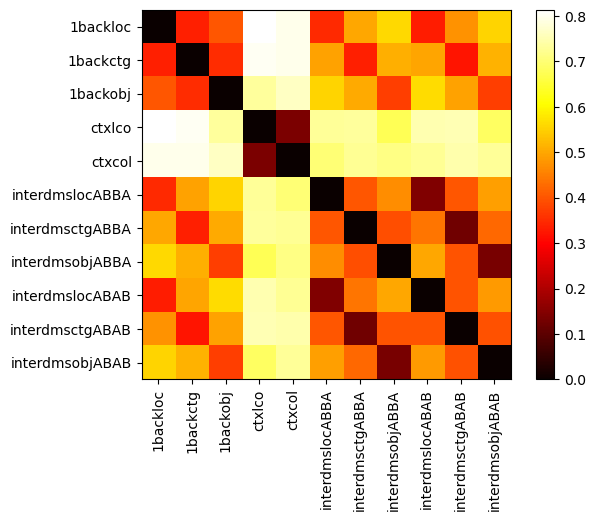

In [158]:
model = SentenceTransformer("all-MiniLM-L6-v2")

instructions = [ins for name,ins in list(ins_mapping.items()) if name in tasks]
names = [name for name,ins in list(ins_mapping.items()) if name in tasks]

setence_rsm = sentence_similarity(instructions, model)

# Create a heatmap from the RSM with ticklabels as sentences
plt.imshow(setence_rsm, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names, )


## Binary Mask

#### Stimuli mask

([<matplotlib.axis.YTick at 0x382265630>,
 [Text(0, 0, '1backloc'),
  Text(0, 1, '1backctg'),
  Text(0, 2, '1backobj'),
  Text(0, 3, 'ctxlco'),
  Text(0, 4, 'ctxcol'),
  Text(0, 5, 'interdmslocABBA'),
  Text(0, 6, 'interdmsctgABBA'),
  Text(0, 7, 'interdmsobjABBA'),
  Text(0, 8, 'interdmslocABAB'),
  Text(0, 9, 'interdmsctgABAB'),
  Text(0, 10, 'interdmsobjABAB')])

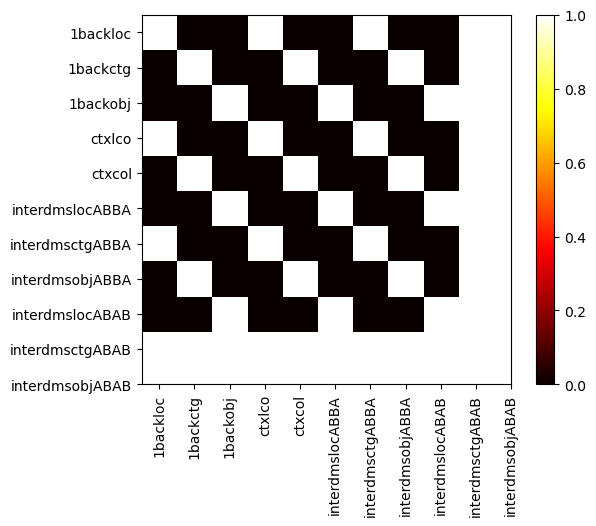

In [159]:
n_tasks = len(tasks)
n_feature_bins = 3 + 3*2 # = 9

# Empty Mask

loc_mask = np.zeros((n_feature_bins, n_feature_bins))
cat_mask = np.zeros((n_feature_bins, n_feature_bins))
obj_mask = np.zeros((n_feature_bins, n_feature_bins))

# Fill in the loc mask
loc_mask[0, 0] = 1
loc_mask[0, 3] = 1
loc_mask[3, 0] = 1
loc_mask[0, 6] = 1
loc_mask[6, 0] = 1

loc_mask[3, 3] = 1
loc_mask[3, 6] = 1
loc_mask[6, 3] = 1
loc_mask[6, 6] = 1

# Fill in the cat mask
cat_mask[1, 1] = 1
cat_mask[1, 4] = 1
cat_mask[4, 1] = 1
cat_mask[1, 7] = 1
cat_mask[7, 1] = 1

cat_mask[4, 4] = 1
cat_mask[4, 7] = 1
cat_mask[7, 4] = 1
cat_mask[7, 7] = 1

# Fill in the obj mask
obj_mask[2, 2] = 1
obj_mask[2, 5] = 1
obj_mask[5, 2] = 1
obj_mask[2, 8] = 1
obj_mask[8, 2] = 1

obj_mask[5, 5] = 1
obj_mask[5, 8] = 1
obj_mask[8, 5] = 1
obj_mask[8, 8] = 1

# Add all masks together
mask = loc_mask + cat_mask + obj_mask

# Plot the mask
plt.imshow(mask, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names, )



#### Task Mask

([<matplotlib.axis.YTick at 0x3822f4a60>,
 [Text(0, 0, '1backloc'),
  Text(0, 1, '1backctg'),
  Text(0, 2, '1backobj'),
  Text(0, 3, 'ctxlco'),
  Text(0, 4, 'ctxcol'),
  Text(0, 5, 'interdmslocABBA'),
  Text(0, 6, 'interdmsctgABBA'),
  Text(0, 7, 'interdmsobjABBA'),
  Text(0, 8, 'interdmslocABAB'),
  Text(0, 9, 'interdmsctgABAB'),
  Text(0, 10, 'interdmsobjABAB')])

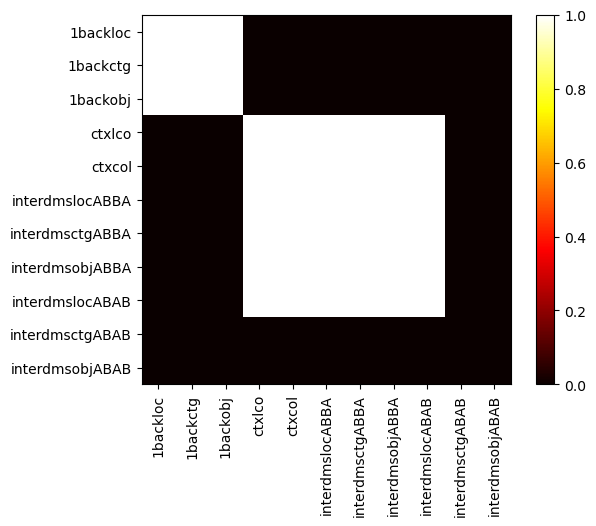

In [160]:
n_tasks = len(tasks)

# Empty Mask

oneback_mask = np.zeros((n_tasks, n_tasks))
interdms_mask = np.zeros((n_tasks, n_tasks))


# Fill in the oneback mask
oneback_mask[0:3, 0:3] = 1

# Fill in the interdms mask
interdms_mask[3:9, 3:9] = 1

# Add all masks together
mask = oneback_mask + interdms_mask

# Plot the mask
plt.imshow(mask, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names, )



## Brain Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os
import surfplot
import nibabel as nib
import h5py
import random
%matplotlib inline

#### Read roi labels

In [10]:
# Load parameters + data # data/data/glasser_data_glm_then_concat/glm_betas/sub-03/correct_ses5_task-interdmsctgABBA_run-02.csv
subj = 'sub-03'
runs = ['run-01', 'run-02', 'run-03', 'run-04', 'run-05']
sessions = ['ses1', 'ses2', 'ses3', 'ses4', 'ses5', 'ses6', 'ses7', 'ses8', 'ses9', 'ses10', 'ses11', 'ses12', 'ses13', 'ses14', 'ses15', 'ses16']
cwd = os.getcwd()

# Get the path of the parent directory
parent_dir = '/Users/lucasgomez/Desktop/Neuro/Bashivan/Misc/Hackthon_WM_fMRI' # os.path.abspath(os.path.join(cwd, os.pardir))

basedir = parent_dir
datadir = basedir + '/data/data/glm_betas_encoding_delay_TR_betas/' + subj + '/'

glasser_atlas_str= basedir + '/data/Glasser_LR_Dense64k.dlabel.nii'
glasser_atlas = nib.load(glasser_atlas_str).get_fdata()[0].astype(int)
print(glasser_atlas.shape)
num_regions = 360

(64984,)


#### Read betas

In [12]:
task_betas = {}
df_conditions = {} # 'task-dmsloc_run-01'

for task in tasks:
    for sess in sessions:
        for run in runs:
            try:
                h5f = h5py.File(datadir + 'normalized_correct_glmmethod1_' + sess + '_' + 'task-' + task + '_' + run + '_betas.h5','r')
                try: 
                    task_betas[task][sess][run] = h5f['betas'][:].copy()
                    df_conditions[task][sess][run] = pd.read_csv(datadir + 'correct_glmmethod1_' + sess + '_' + 'task-' + task + '_' + run + '.csv')
                except Exception as e:
                    try:
                        task_betas[task][sess] = {}
                        task_betas[task][sess][run] = h5f['betas'][:].copy()
                        df_conditions[task][sess] = {}
                        df_conditions[task][sess][run] = pd.read_csv(datadir + 'correct_glmmethod1_' + sess + '_' + 'task-' + task + '_' + run + '.csv')
                    except Exception as e:
                        task_betas[task] = {}
                        task_betas[task][sess] = {}
                        task_betas[task][sess][run] = h5f['betas'][:].copy()
                        df_conditions[task]= {}
                        df_conditions[task][sess] = {}
                        df_conditions[task][sess][run] = pd.read_csv(datadir + 'correct_glmmethod1_' + sess + '_' + 'task-' + task + '_' + run + '.csv')
                h5f.close()
            except Exception as e:
                continue


### Isolate first delay betas

In [13]:
filtered_task_betas = task_betas.copy()

for task in task_betas.keys():
    for sess in task_betas[task].keys():
        for run in task_betas[task][sess].keys():
            task_df = df_conditions[task][sess][run]
            # Filter task_df based on task_df['prev_stimulus'] == 1000  and task_df['regressor_type'] == 'encoding'
            # Filter task_df based on task_df['prev_stimulus'] == 1000  and task_df['regressor_type'] == 'delay' or task_df['regressor_type'] == 'encoding'
            filtered_delay_df = task_df[(task_df['prev_stimulus'] == 1000) & (task_df['regressor_type'] == 'delay')]
            filtered_encoding_df = task_df[(task_df['prev_stimulus'] == 1000) & (task_df['regressor_type'] == 'encoding')]  
            betas  = task_betas[task][sess][run]
            try:
                # Divide all values of filtered_delay_df.loc[:, 0] by 2
                filtered_delay_df.loc[:, 'Unnamed: 0'] = filtered_delay_df.loc[:, 'Unnamed: 0'] // 2
                betas_delay = betas[:, filtered_delay_df['Unnamed: 0'].to_numpy()]

                # Divide all values of filtered_encoding_df.loc[:, 0] by 2
                filtered_encoding_df.loc[:, 'Unnamed: 0'] = filtered_encoding_df.loc[:, 'Unnamed: 0'] // 2
                betas_encoding = betas[:, filtered_encoding_df['Unnamed: 0'].to_numpy()]

                print('betas_delay: ', betas_delay.shape)
                print('betas_encoding: ', betas_encoding.shape)

                # Average betas_delay and betas_encoding
                betas = np.mean([betas_delay, betas_encoding], axis=0)

                print('betas: ', betas.shape)
            except Exception as e:
                print(e)
                # print('Error in task: ', task, ' sess: ', sess, ' run: ', run)

            filtered_task_betas[task][sess][run] = betas

task_betas = filtered_task_betas

betas_delay:  (64984, 8)
betas_encoding:  (64984, 8)
betas:  (64984, 8)
betas_delay:  (64984, 9)
betas_encoding:  (64984, 9)
betas:  (64984, 9)
betas_delay:  (64984, 9)
betas_encoding:  (64984, 9)
betas:  (64984, 9)
betas_delay:  (64984, 9)
betas_encoding:  (64984, 9)
betas:  (64984, 9)
betas_delay:  (64984, 9)
betas_encoding:  (64984, 9)
betas:  (64984, 9)
betas_delay:  (64984, 9)
betas_encoding:  (64984, 9)
betas:  (64984, 9)
betas_delay:  (64984, 9)
betas_encoding:  (64984, 9)
betas:  (64984, 9)
betas_delay:  (64984, 9)
betas_encoding:  (64984, 9)
betas:  (64984, 9)
betas_delay:  (64984, 9)
betas_encoding:  (64984, 9)
betas:  (64984, 9)
betas_delay:  (64984, 9)
betas_encoding:  (64984, 9)
betas:  (64984, 9)
betas_delay:  (64984, 9)
betas_encoding:  (64984, 9)
betas:  (64984, 9)
betas_delay:  (64984, 9)
betas_encoding:  (64984, 9)
betas:  (64984, 9)
betas_delay:  (64984, 9)
betas_encoding:  (64984, 9)
betas:  (64984, 9)
betas_delay:  (64984, 9)
betas_encoding:  (64984, 9)
betas:  (64

In [6]:
task_betas

{'1backloc': {'ses1': {'run-01': array([[ 1.20159643,  1.03785944, -3.04872834, ...,  4.01619101,
            1.87801743, -1.82136971],
          [-2.06100863, -0.80862225, -1.91882662, ..., -2.14617819,
            1.24712672,  0.22505155],
          [ 2.6562679 ,  1.18839093,  3.07589638, ..., 10.14171797,
            1.13763013,  4.96084882],
          ...,
          [ 0.13263457,  0.2681343 ,  3.03316134, ...,  1.52371133,
            0.98712915,  2.40603799],
          [ 0.8257731 , -0.72985344,  3.55716792, ..., -0.79699618,
            2.01520692,  3.24352609],
          [-0.58203435,  0.49874064,  6.03428451, ..., -0.31339151,
           -1.17785688,  4.46495981]])},
  'ses2': {'run-01': array([[-1.92733613, -0.08528773,  2.21729369, ...,  3.86362596,
           -0.49972444, -4.05806651],
          [ 0.46204114, -0.0462399 ,  2.34233209, ..., -1.94806196,
            1.78220594, -3.40348   ],
          [ 6.48248974, -0.76284278, -8.57115728, ..., -4.62758041,
            2.1356

#### Region Mapping

In [165]:
map_df_lh = pd.read_excel(basedir + '/data/Glasser_2016_Table.xlsx')
map_df_lh = map_df_lh.iloc[:,0:2]

# Insert row with region 0
map_df_lh.loc[-1] = [0, 'LG']
map_df_lh.index = map_df_lh.index + 1  # shifting index
map_df_lh.sort_index(inplace=True)

# Rename columns
map_df_lh.columns = ['region_id', 'region_name']

map_df_rh = map_df_lh.copy()

# Increase map_df_rh region_id by 180 and index by 180
map_df_rh['region_id'] = map_df_rh['region_id'] + 180
map_df_rh.index = map_df_rh.index + 180

# Concatenate both hemispheres
map_df = pd.concat([map_df_lh, map_df_rh], axis=0)

map_df

,region_id,region_name
0,0,LG
1,1,V1
2,2,MST
3,3,V6
4,4,V2
...,...,...
356,356,STSva
357,357,TE1m
358,358,PI
359,359,a32pr


In [166]:
# check unique values in the region_id column
map_df

,region_id,region_name
0,0,LG
1,1,V1
2,2,MST
3,3,V6
4,4,V2
...,...,...
356,356,STSva
357,357,TE1m
358,358,PI
359,359,a32pr


In [167]:
mapped_atlas = {}

for id, name in zip(map_df['region_id'], map_df['region_name']):
    # indexes of id in glasser_atlas
    if str(name) not in mapped_atlas.keys():
        mapped_atlas[str(name)] = np.where(glasser_atlas == id)[0]
    else:
        mapped_atlas[str(name)] = np.concatenate((mapped_atlas[str(name)], np.where(glasser_atlas == id)[0]))

## Avg Betas Across Sessions, Runs, and Trials

In [168]:
avg_betas_dict = {}

# Across each region
for name, indexes in mapped_atlas.items():
    avg_betas_dict[name] = {}

    # Across each task
    for task in task_betas.keys():
        sess_betas = torch.tensor([])

        sessions = list(task_betas[task].keys())

        # Across each session
        for sess in sessions:
            run_betas = torch.tensor([])

            # Across each run
            for run in task_betas[task][sess].keys():
                # Betas for all trials
                betas = torch.tensor(task_betas[task][sess][run][indexes])

                # Check if betas is all zeros
                if torch.sum(betas) == 0 and name != 'LG':
                    print('Found all zeros for ' + name + ' ' + task + ' ' + sess + ' ' + run)
                    continue

                # Mean beta across trials
                trial_avg_betas = torch.mean(betas, axis=1).unsqueeze(1)

                # Add to run_betas
                run_betas = torch.cat((run_betas, trial_avg_betas), axis=1)
            
            # Check if run_betas is not empty
            if run_betas.shape[0] != 0:
                run_betas = torch.mean(run_betas, axis=1).unsqueeze(1)
                sess_betas = torch.cat((sess_betas, run_betas), axis=1)
            else:
                print('no data at: ', name, task, sess, run)
        sess_betas = torch.mean(sess_betas, axis=1)  
        avg_betas_dict[name][task] = sess_betas

avg_brain_dict = {}
# Average across all regions
for name in avg_betas_dict.keys():
    for task in avg_betas_dict[name].keys():
        if task not in avg_brain_dict.keys():
            avg_brain_dict[task] = avg_betas_dict[name][task]
        else:
            avg_brain_dict[task] = torch.cat((avg_brain_dict[task], avg_betas_dict[name][task]), axis=0)


torch.Size([65043])
torch.Size([65043])
torch.Size([65043])
torch.Size([65043])
torch.Size([65043])
torch.Size([65043])
torch.Size([65043])
torch.Size([65043])
torch.Size([65043])
torch.Size([65043])
torch.Size([65043])


In [169]:
avg_betas_dict['V1']['1backloc'].shape

torch.Size([1610])

#### Make RSMs

In [170]:
avg_brain_dict['1backctg'].shape

torch.Size([65043])

In [189]:
betas = torch.stack(list(avg_brain_dict.values()))
avg_brain_rsm = util.cos_sim(betas, betas).numpy()
# avg_brain_rsm = pairwise_pearsonr(betas) 
# avg_brain_rsm = pairwise_euclidean(betas)

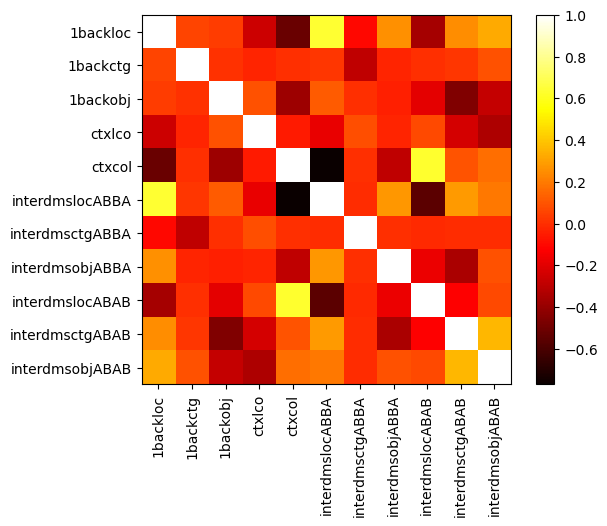

In [190]:
area = 'V1'

# Plot v1_betas_rdm with ticklabels as sentences
plt.imshow(avg_brain_rsm, cmap='hot', interpolation='nearest')
plt.colorbar()
_ = plt.xticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys(), rotation=90)
_ = plt.yticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys())


In [191]:
brain_rsms = {}
for name in avg_betas_dict.keys():
    betas = torch.stack(list(avg_betas_dict[name].values()))
    brain_rsms[name] = util.cos_sim(betas, betas).numpy()

    # Pearson correlation
    # brain_rsms[name] = pairwise_pearsonr(betas.numpy())

    # Eucledian distance
    # brain_rsms[name] = pairwise_euclidean(betas.numpy())

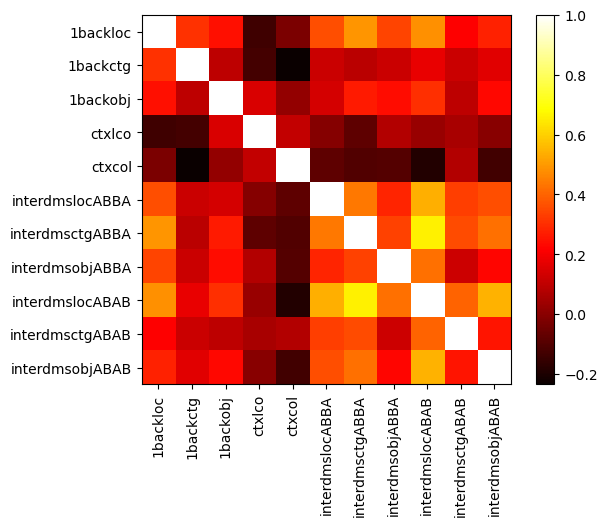

In [192]:
area = 'PFt'

# Plot v1_betas_rdm with ticklabels as sentences
plt.imshow(brain_rsms[area], cmap='hot', interpolation='nearest')
plt.colorbar()
_ = plt.xticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys(), rotation=90)
_ = plt.yticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys())

In [135]:
# # Iterate over all regions
# for area in brain_rsms.keys():
  
#     plt.clf()
#     plt.imshow(brain_rsms[area], cmap='hot', interpolation='nearest')
#     plt.colorbar()
#     _ = plt.xticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys(), rotation=90)
#     _ = plt.yticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys())
#     plt.savefig('/Users/lucasgomez/Desktop/Neuro/Bashivan/Misc/Hackthon_WM_fMRI/tasks/4.2 - NL Similarity/figures/average/' + area + '.png')

#### Compare RSMs

In [178]:
import numpy as np
from scipy.stats import pearsonr

def compare_rsms(rdm1, rdm2):
    # Flatten the RSMs
    rdm1_flat = rdm1.flatten()
    rdm2_flat = rdm2.flatten()
    
    # Compute Pearson correlation
    correlation, _ = pearsonr(rdm1_flat, rdm2_flat)
    
    return correlation

rsms_comp = {}
for name in brain_rsms.keys():
    # Get upper triangular part of the RSMs
    triu_setence_rsm =setence_rsm[np.triu_indices(setence_rsm.shape[0], k=1)]  #  mask[np.triu_indices(mask.shape[0], k=1)] # 
    triu_brain_rsm = brain_rsms[name][np.triu_indices(brain_rsms[name].shape[0], k=1)]


    sim = compare_rsms(triu_setence_rsm, triu_brain_rsm)
    if sim > 0.9995:
        print(name, sim)
    rsms_comp[name] = sim

# Create a bar plot of the RSMs comparison
# plt.bar(rsms_comp.keys(), rsms_comp.values())
rsms_comp['LG'] = np.nan

In [179]:
# sort the rsms_comp dictionary by value
rsms_comp = dict(sorted(rsms_comp.items(), key=lambda item: item[1]))

# Print the top 5 dictionary values along with their key
for key in list(rsms_comp.keys())[-10:]:
    print(key, rsms_comp[key])

10pp -0.0016108468412938453
7Pm -2.322707694043403e-05
VIP 0.0007337556644354185
10r 0.0009501233749277017
43 0.0019480477377286213
LO1 0.004183138789046468
PFt 0.018462700206948922
H 0.035789459961806366
TE2a 0.041366318327019515
TGv 0.07620690741132494


In [138]:
max(list(rsms_comp.values())[1:])

0.5517366615012852

name:  LG
[nan]
name:  V1
[0.3699152306732756]
name:  MST
[0.008136412518785545]
name:  V6
[-0.07544017834040538]
name:  V2
[0.23398517638112845]
name:  V3
[0.07908806468157548]
name:  V4
[0.24344168361304777]
name:  V8
[0.09500528083923047]
name:  4
[0.22709901353770587]
name:  3b
[0.42824990381828254]
name:  FEF
[0.34621255058371353]
name:  PEF
[0.20295931768395525]
name:  55b
[0.13160772548548103]
name:  V3A
[0.053875737927615734]
name:  RSC
[-0.08214127830696989]
name:  POS2
[0.09427100520214136]
name:  V7
[0.1588829495840423]
name:  IPS1
[-0.023764265798982113]
name:  FFC
[0.09184795163579675]
name:  V3B
[-0.05047141324391206]
name:  LO1
[0.3987652866650386]
name:  LO2
[-0.07001874369332813]
name:  PIT
[0.28485331319199403]
name:  MT
[0.23053388133607097]
name:  A1
[-0.2387732310341084]
name:  PSL
[0.08238182554922953]
name:  SFL
[-0.018944089172713785]
name:  PCV
[-0.1348820924631788]
name:  STV
[-0.13721086598346824]
name:  7Pm
[0.057390638454078935]
name:  7m
[0.067167608736926

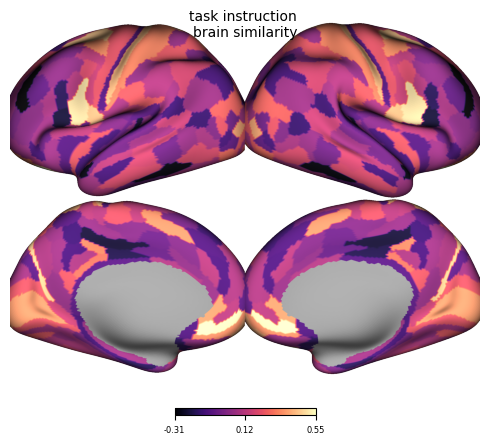

In [139]:
from neuromaps.datasets import fetch_fslr

# Fetch the fsLR atlas
surfaces = fetch_fslr()
lh, rh = surfaces['veryinflated']
surface_dat = np.zeros((len(glasser_atlas),))

count_regs = 0

# Create a surface data array
for name, indexes in mapped_atlas.items():

    print('name: ', name)
    print([rsms_comp[name]])
    count_regs = count_regs + len(indexes)
    sim_repeated = np.array([rsms_comp[name]]*len(indexes))

    surface_dat[indexes] = np.nan_to_num(sim_repeated)

p = surfplot.Plot(lh,rh,size=(1000,750),zoom=1.8)
p.add_layer(surface_dat.T,cmap='magma',color_range=[np.min(surface_dat), np.max(surface_dat)])  
fig = p.build(figsize=(5,5),colorbar=True,cbar_kws={'fontsize':6})
fig.suptitle('task instruction \nbrain similarity',y=0.88,fontsize=10)
fig.tight_layout()
fig.savefig('figures/task_ins_similarity.png',dpi=300)


In [140]:
# from neuromaps.datasets import fetch_fslr

# # Fetch the fsLR atlas
# surfaces = fetch_fslr()
# lh, rh = surfaces['veryinflated']
# surface_dat = np.zeros((len(glasser_atlas),))

# count_regs = 0

# # Create a surface data array
# for name, indexes in mapped_atlas.items():
#     count_regs = count_regs + len(indexes)
#     sim_repeated = np.array([rsms_comp[name]]*len(indexes))

#     # if name in ['44']:
#     #     surface_dat[indexes] = np.nan_to_num(sim_repeated)
    
#     # if name in ['V1']:
#     #     surface_dat[indexes] = surface_dat[indexes] = np.array([torch.tensor(0.0, dtype=torch.float64)]*len(indexes))


# p = surfplot.Plot(lh,rh,size=(1000,750),zoom=1.8)
# p.add_layer(surface_dat.T,cmap='magma',color_range=[np.min(surface_dat), np.max(surface_dat)])  
# fig = p.build(figsize=(5,5),colorbar=True,cbar_kws={'fontsize':6})
# fig.suptitle('task instruction \nbrain similarity',y=0.88,fontsize=10)
# fig.tight_layout()


## Cross val

In [141]:
avg_betas_dict_split_1 = {}
avg_betas_dict_split_2 = {}

# Across each region
for name, indexes in mapped_atlas.items():
    avg_betas_dict_split_1[name] = {}
    avg_betas_dict_split_2[name] = {}

    # Across each task
    for task in task_betas.keys():
        sess1_betas = torch.tensor([])
        sess2_betas = torch.tensor([])

        # # Split sessions into two groups
        sessions = list(task_betas[task].keys())

        print(len(sessions))

        # random.shuffle(sessions)
        sessions_1 = sessions[:len(sessions)//2]
        sessions_2 = sessions[len(sessions)//2:]

        # Split sessions into two random groups


        # Make them equal
        if len(sessions) % 2 != 0:
            sessions_2 = sessions_2[:-1]

        for sess in sessions_1:
            run_betas = torch.tensor([])

            # Across each run
            for run in task_betas[task][sess].keys():
                # Betas for all trials
                betas = torch.tensor(task_betas[task][sess][run][indexes])

                # Check if betas is all zeros
                if torch.sum(betas) == 0 and name != 'LG':
                    print('Found all zeros for ' + name + ' ' + task + ' ' + sess + ' ' + run)
                    continue


                # Mean beta across trials
                trial_avg_betas = torch.mean(betas, axis=1).unsqueeze(1)

                # Add to run_betas
                run_betas = torch.cat((run_betas, trial_avg_betas), axis=1)
            
            # Check if run_betas is not empty
            if run_betas.shape[0] != 0:
                run_betas = torch.mean(run_betas, axis=1).unsqueeze(1)
                sess1_betas = torch.cat((sess1_betas, run_betas), axis=1)
            else:
                print('no data at: ', name, task, sess, run)

        sess1_betas = torch.mean(sess1_betas, axis=1)  
        avg_betas_dict_split_1[name][task] = sess1_betas


        for sess in sessions_2:
            run_betas = torch.tensor([])

            # Across each run
            for run in task_betas[task][sess].keys():
                # Betas for all trials
                betas = torch.tensor(task_betas[task][sess][run][indexes])

                # Check if betas is all zeros
                if torch.sum(betas) == 0 and name != 'LG':
                    print('Found all zeros for ' + name + ' ' + task + ' ' + sess + ' ' + run)
                    continue
                
                # Mean beta across trials
                trial_avg_betas = torch.mean(betas, axis=1).unsqueeze(1)

                # Add to run_betas
                run_betas = torch.cat((run_betas, trial_avg_betas), axis=1)
            
            # Check if run_betas is not empty
            if run_betas.shape[0] != 0:
                run_betas = torch.mean(run_betas, axis=1).unsqueeze(1)
                sess2_betas = torch.cat((sess2_betas, run_betas), axis=1)
            else:
                print('no data at: ', name, task, sess, run)

        sess2_betas = torch.mean(sess2_betas, axis=1)  
        avg_betas_dict_split_2[name][task] = sess2_betas


avg_brain_dict_split_1 = {}
avg_brain_dict_split_2 = {}
# Average across all regions
for name in avg_betas_dict_split_1.keys():
    for task in avg_betas_dict_split_1[name].keys():
        if task not in avg_brain_dict_split_1.keys():
            avg_brain_dict_split_1[task] = avg_betas_dict_split_1[name][task]
            avg_brain_dict_split_2[task] = avg_betas_dict_split_2[name][task]
        else:
            avg_brain_dict_split_1[task] = torch.cat((avg_brain_dict_split_1[task], avg_betas_dict_split_1[name][task]), axis=0)
            avg_brain_dict_split_2[task] = torch.cat((avg_brain_dict_split_2[task], avg_betas_dict_split_2[name][task]), axis=0)

for task in avg_brain_dict_split_1.keys():
    torch.mean(avg_brain_dict_split_1[task], axis=0)
    torch.mean(avg_brain_dict_split_2[task], axis=0)



12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
12
2
2
12
12
10
5
4
12
5
5
1

In [142]:
betas_split_1 = torch.stack(list(avg_brain_dict_split_1.values()))
betas_split_2 = torch.stack(list(avg_brain_dict_split_2.values()))
avg_brain_split_rsm = util.cos_sim(betas_split_1, betas_split_2).numpy()

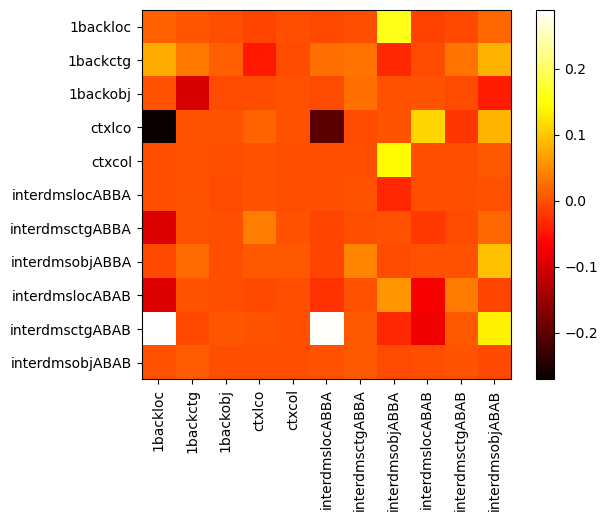

In [143]:
# Plot v1_betas_rdm with ticklabels as sentences
plt.imshow(avg_brain_split_rsm, cmap='hot', interpolation='nearest')
plt.colorbar()
_ = plt.xticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys(), rotation=90)
_ = plt.yticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys())


In [144]:
brain_split_rsms = {}
for name in avg_betas_dict_split_1.keys():
    betas_split1 = torch.stack(list(avg_betas_dict_split_1[name].values()))
    betas_split2 = torch.stack(list(avg_betas_dict_split_2[name].values()))
    brain_split_rsms[name] = util.cos_sim(betas_split1, betas_split1).numpy()

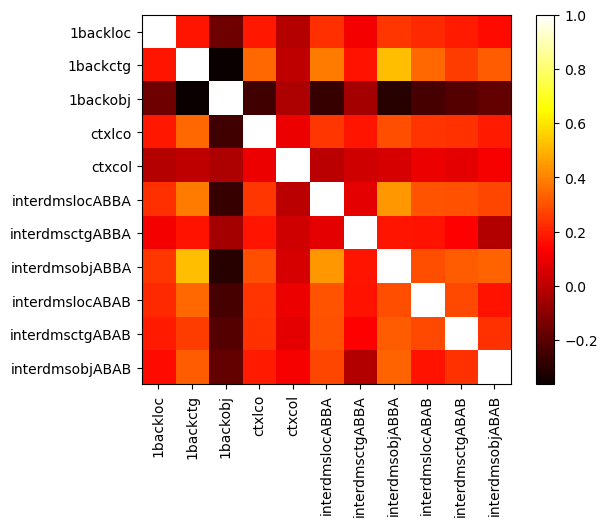

In [145]:
area = 'V1'

# Plot v1_betas_rdm with ticklabels as sentences
plt.imshow(brain_split_rsms[area], cmap='hot', interpolation='nearest')
plt.colorbar()
_ = plt.xticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys(), rotation=90)
_ = plt.yticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys())


FileNotFoundError: [Errno 2] No such file or directory: '/Users/lucasgomez/Desktop/Neuro/Bashivan/Misc/Hackthon_WM_fMRI/tasks/4.2 - NLP Similarity/figures/cross_val/LG.png'

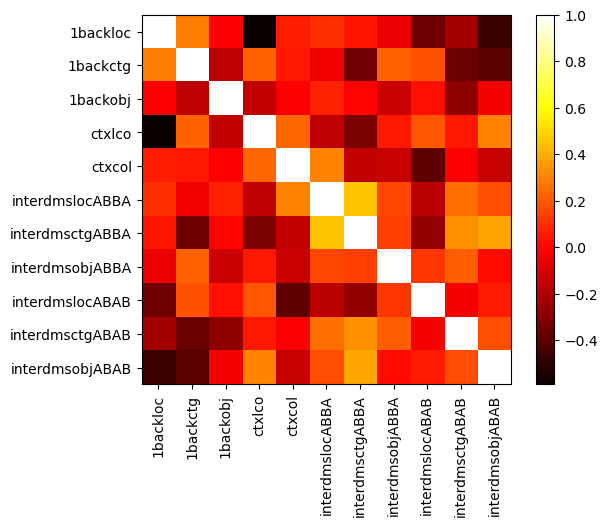

In [146]:
# Iterate over all regions
for area in brain_rsms.keys():
  
    plt.clf()
    plt.imshow(brain_split_rsms[area], cmap='hot', interpolation='nearest')
    plt.colorbar()
    _ = plt.xticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys(), rotation=90)
    _ = plt.yticks(range(len(avg_betas_dict[area].keys())), avg_betas_dict[area].keys())
    plt.savefig('/Users/lucasgomez/Desktop/Neuro/Bashivan/Misc/Hackthon_WM_fMRI/tasks/4.2 - NLP Similarity/figures/cross_val/' + area + '.png')